In [14]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [15]:
# Import and load the data
# Check what its doing and then use it to create our own variables
# keras.datasets.mnist.load_data?
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
# Try to understand data
type(x_train)
len(x_train)
# print(x_train)
len(x_train[0])
# print(x_train[0])
len(x_train[0][0])
# print(x_train[0][0])
# Can't understand it :(
# Test other way, not working
# from pprint import pprint
# pprint(x_train[0])
# Better way
import numpy as np
np.set_printoptions(linewidth=5000)
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

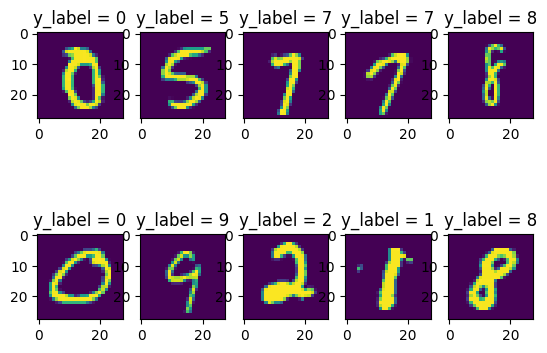

In [18]:
# Showing images
# plt.imshow(x_train[0])
# Show multiple random data from dataset
import random
for i in range(1, 11):
    x = random.randrange(0, len(x_train))
    plt.subplot(2, 5, i)
    plt.title(f"y_label = {y_train[x]}")
    plt.imshow(x_train[x])
    plt.show

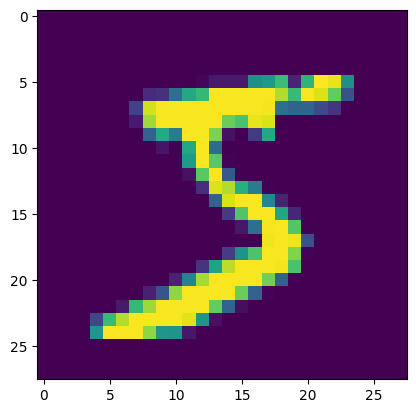

In [19]:
# Machine Learning Models operate on floats, not integers
x_train = x_train/255.0
x_test = x_test/255.0
# print(x_train[0])
plt.imshow(x_train[0])

In [20]:
# Sequential is a class that describe the type of the model
# It is Sequential because our layers will be added sequentially
from tensorflow.keras import Sequential
# Dense is a fully Connected Layer
# Flatten convert 28*28 data of our images to one dimensional array so we can fit it to the model
from tensorflow.keras.layers import Dense, Flatten

In [21]:
# OOP, we now creating an instance of a sequential model class, type of our model
model = Sequential()

# Describe the Model
# Adding layers to our model
# Flatten Layer
model.add(Flatten(input_shape=(28,28)))
# Fully connected layer with 256 neurons, and activation function
model.add(Dense(units=256, activation='relu'))
# Output layer, 10 class so 10 units
model.add(Dense(units=10, activation='softmax'))


In [22]:
print(x_train.shape)
print(x_test.shape)
model.summary()

(60000, 28, 28)
(10000, 28, 28)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Solver Contain:
# Optimizer: how to find the solution
# Loss Function: how to measure the error
# Metrics: array of things to track to see the performance of the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
# You can write the same thing but in tensorflow
# model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [26]:
%%time
# Do the training itself
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8914 - loss: 0.3811 - val_accuracy: 0.9652 - val_loss: 0.1169
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9699 - loss: 0.1012 - val_accuracy: 0.9728 - val_loss: 0.0860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9828 - loss: 0.0572 - val_accuracy: 0.9773 - val_loss: 0.0753
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0415 - val_accuracy: 0.9754 - val_loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9812 - val_loss: 0.0670
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9935 - loss: 0.0215 - val_accuracy: 0.9773 - val_loss: 0.0813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9945 - loss: 0.0183 - val_accuracy: 0.9791 - val_loss: 0.0729
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9960 - loss: 0.0138 -

In [29]:
h=model.history.history

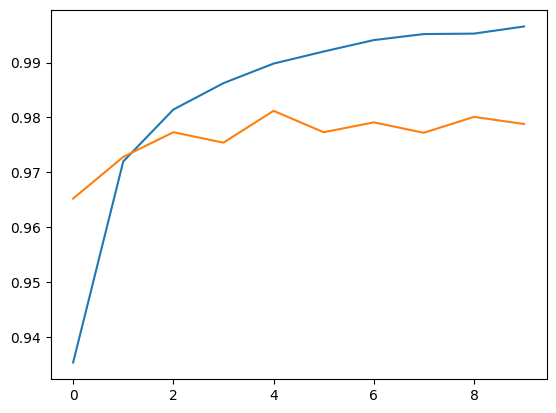

In [33]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

In [36]:
# Cause your result to  always be the same on all machines
# Means that your random generator will always use random generator number 1
tf.random.set_seed(1)
model = Sequential()

# Describe model
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# Describe solver
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fit model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7346 - loss: 0.8392 - val_accuracy: 0.9270 - val_loss: 0.2531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9312 - loss: 0.2365 - val_accuracy: 0.9426 - val_loss: 0.1998
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9451 - loss: 0.1903 - val_accuracy: 0.9404 - val_loss: 0.1970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9502 - loss: 0.1693 - val_accuracy: 0.9458 - val_loss: 0.1770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9551 - loss: 0.1554 - val_accuracy: 0.9481 - val_loss: 0.1727
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9544 - loss: 0.1534 - val_accuracy: 0.9480 - val_loss: 0.1741
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9586 - loss: 0.1407 - val_accuracy: 0.9459 - val_loss: 0.1813
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9592 - loss: 0.1360 - 

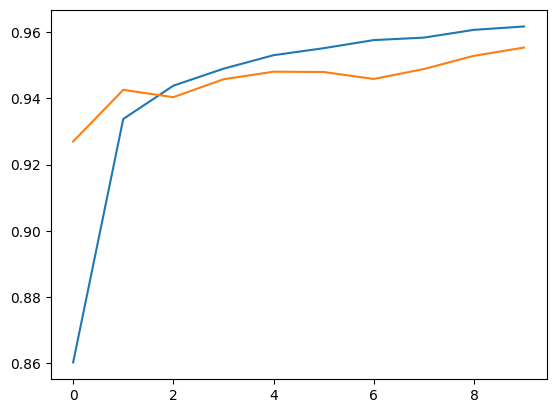

In [37]:
h = model.history.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

In [38]:
model = Sequential()

# Describe model
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# Describe solver
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fit model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8064 - loss: 0.6334 - val_accuracy: 0.9501 - val_loss: 0.1695
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9554 - loss: 0.1496 - val_accuracy: 0.9627 - val_loss: 0.1201
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9689 - loss: 0.1043 - val_accuracy: 0.9691 - val_loss: 0.1030
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9752 - loss: 0.0812 - val_accuracy: 0.9673 - val_loss: 0.1112
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0678 - val_accuracy: 0.9610 - val_loss: 0.1343
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9834 - loss: 0.0536 - val_accuracy: 0.9684 - val_loss: 0.1220
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0473 - val_accuracy: 0.9709 - val_loss: 0.1131
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0432 - 

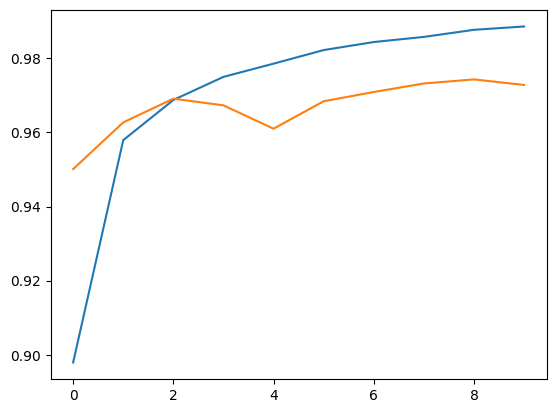

In [39]:
h = model.history.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

In [41]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1260


[0.0992552787065506, 0.9728000164031982]

In [42]:
print(model.weights)

[<Variable path=sequential_5/dense_12/kernel, shape=(784, 64), dtype=float32, value=[[-0.08218796  0.00435493 -0.07081386 ... -0.03101014 -0.02192402 -0.01518159]
 [-0.01680199 -0.06659882 -0.0566237  ... -0.01079228 -0.07473493  0.00536226]
 [ 0.04013067 -0.06287066 -0.05529442 ...  0.02108469  0.0781148   0.01245006]
 ...
 [ 0.03903431 -0.01835232 -0.07106945 ...  0.024406    0.0168838  -0.05248702]
 [-0.06655166 -0.04689097 -0.08363417 ... -0.04428     0.00932343  0.05803316]
 [ 0.06471034  0.02077324 -0.00073208 ...  0.00080989 -0.00221682  0.01923141]]>, <Variable path=sequential_5/dense_12/bias, shape=(64,), dtype=float32, value=[-0.04986516 -0.09136159 -0.2072711  -0.13591039  0.09492545  0.16504182  0.13234864  0.09457509  0.16091387  0.04556914 -0.0722513   0.00524531 -0.10537914  0.2706006   0.08007767 -0.16222501  0.2886621   0.07396352  0.09016889  0.06412639  0.07931732  0.14852205 -0.12746717  0.03591332 -0.0604726  -0.04315652  0.1594533   0.10428812 -0.03089733  0.32110

In [44]:
last = model.get_layer(index=-1)
last.weights

[<Variable path=sequential_5/dense_15/kernel, shape=(16, 10), dtype=float32, value=[[ 2.91143376e-02  3.11448961e-01  6.07178688e-01 -1.22137673e-01  9.87935737e-02 -6.95506576e-03  1.27521679e-01  6.70085967e-01 -2.86534458e-01 -5.30147254e-01]
  [-3.42664927e-01  8.82380232e-02  3.76284063e-01 -2.92419910e-01  2.18751505e-01  2.52758235e-01  1.69894516e-01 -1.75865173e-01  4.63159472e-01  4.52646732e-01]
  [-7.45036379e-02 -4.43650521e-02 -2.38907337e-01  6.76702619e-01 -6.64048791e-01  1.62099168e-01  4.61775124e-01 -3.62963498e-01  3.69763434e-01 -8.35618451e-02]
  [-1.92396007e-02  5.81008315e-01  2.35880002e-01  4.20809127e-02 -4.56457466e-01  2.32333854e-01  4.15085435e-01 -5.18593967e-01 -4.85623702e-02  2.63264298e-01]
  [-1.66767985e-02 -1.62307099e-01  2.53626764e-01 -1.50447711e-01 -2.34314740e-01 -1.74770072e-01 -1.10529125e+00  5.36267579e-01  1.27279490e-01  2.82968819e-01]
  [ 1.19464964e-01 -2.75865108e-01 -1.86073542e-01  5.65247536e-01 -3.43766332e-01  4.43617016e-01

(1, 28, 28)
y_label = 7


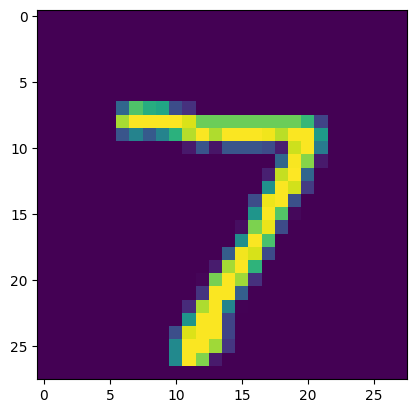

In [51]:
plt.imshow(x_test[0])
inp = x_test[0].reshape(1, 28, 28)
print(inp.shape)
print(f'y_label = {y_test[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.2360858e-10 1.5529643e-07 8.4942383e-07 3.7106391e-05 3.9497579e-11 1.3479409e-09 8.9734290e-19 9.9996066e-01 4.3253507e-08 1.2957381e-06]]
the probability distribution for number 0 is 1.2360858170357147e-10
the probability distribution for number 1 is 1.5529643349054822e-07
the probability distribution for number 2 is 8.494238272760413e-07
the probability distribution for number 3 is 3.7106390664121136e-05
the probability distribution for number 4 is 3.949757881871463e-11
the probability distribution for number 5 is 1.3479408700334261e-09
the probability distribution for number 6 is 8.97342899290388e-19
the probability distribution for number 7 is 0.9999606609344482
the probability distribution for number 8 is 4.325350744238676e-08
the probability distribution for number 9 is 1.2957381159139914e-06
biggest probability is 0.9999606609344482 which is for number 7


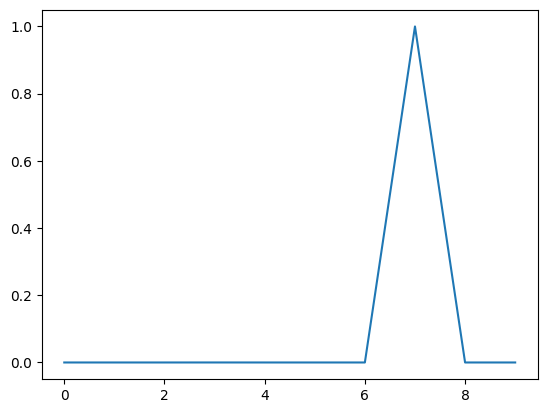

In [68]:
# model result
res = model.predict(inp)
print(res)
plt.plot(range(10), res[0])
biggest = -1
for i in range(10):
    track = res[0][i]
    if track > biggest:
        biggest = track
        biggest_i = i
    print(f"the probability distribution for number {i} is {res[0][i]}")

print(f"biggest probability is {biggest} which is for number {biggest_i}")

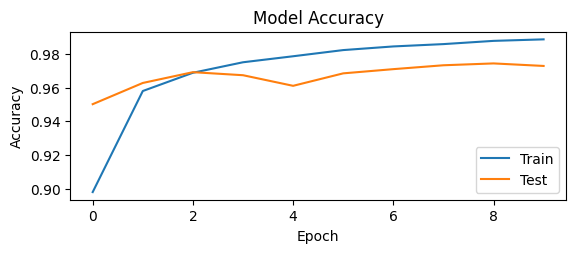

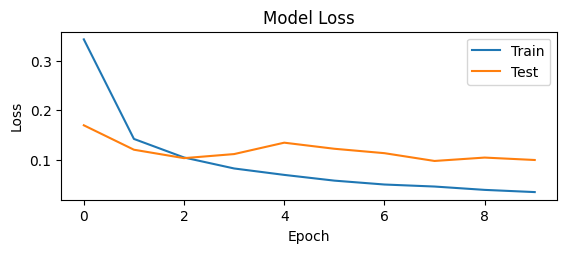

In [76]:
plt.subplot(2, 1, 1)
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.subplot(2, 1, 2)
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()